In [ ]:

!pip install torch torchvision opacus pandas scikit-learn matplotlib seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.7/251.7 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
pip uninstall numpy -y


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4


In [ ]:
pip install numpy --upgrade --force-reinstall


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 63.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opacus 1.5.3 requires numpy<2.0,>=1.15, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.


In [ ]:
pip install numpy==1.24.4


In [ ]:
pip install numpy==1.24.4


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import torch
from torch.utils.data import DataLoader, TensorDataset
from torch import nn, optim
from opacus import PrivacyEngine
import matplotlib.pyplot as plt

# Load the dataset (ensure "diabetes.csv" is in the same directory)
df = pd.read_csv("/content/diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [ ]:
print(df.shape)

(768, 9)


In [ ]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [ ]:
print("Dataset Shape:", df.shape)
print("\nData Types and Missing Values:")
print(df.info())

Dataset Shape: (768, 9)

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


**EXPLORATORY DATA ANALYSIS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<Figure size 1000x1000 with 0 Axes>

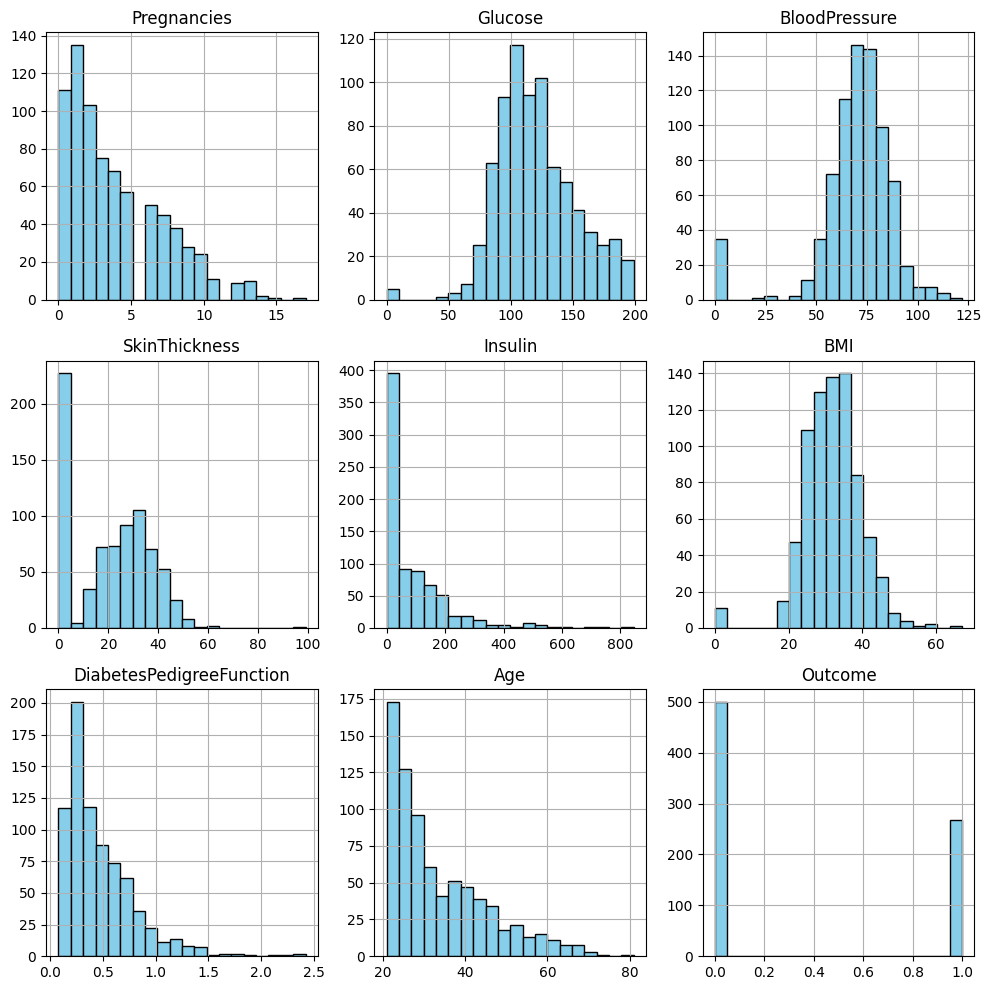

In [ ]:
plt.figure(figsize=(10, 10))
df.hist(figsize=(10, 10), bins=20, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

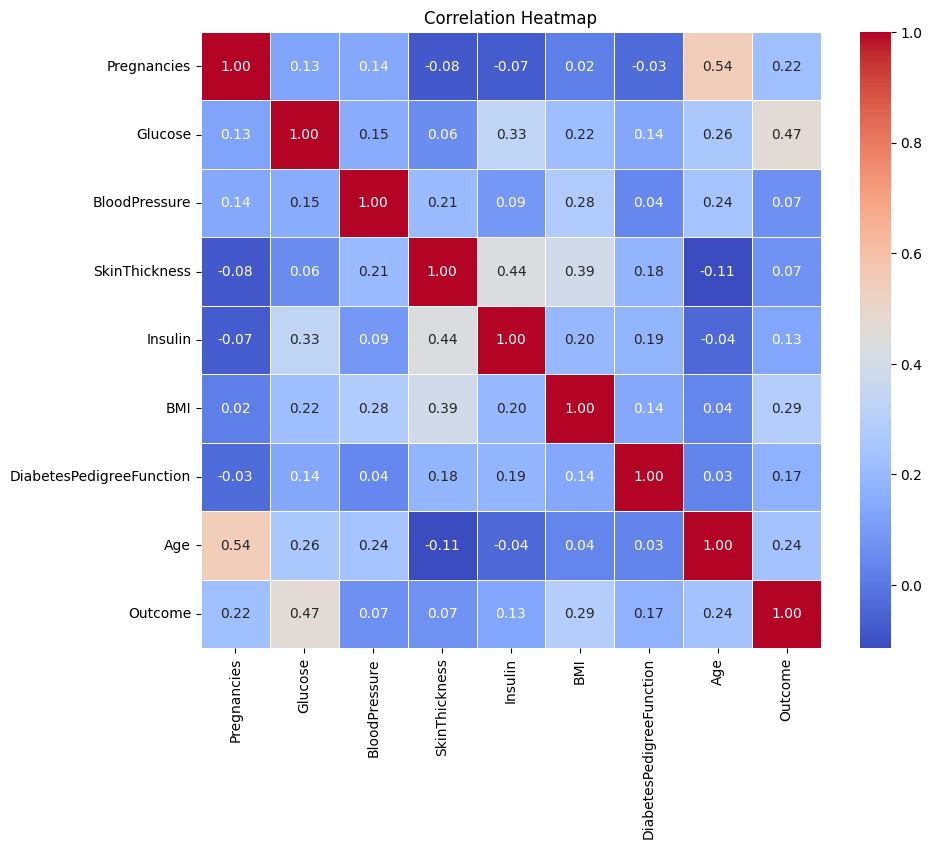

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


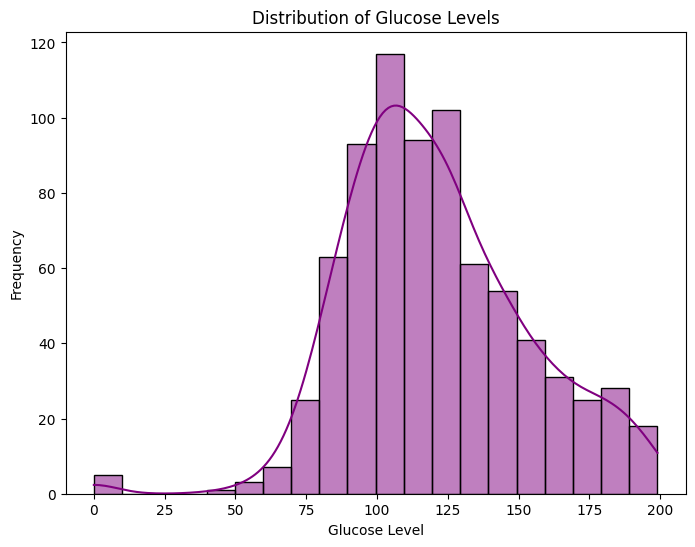

In [ ]:
#  Visualizing the Glucose Level Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Glucose'], kde=True, color='purple', bins=20)
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.show()


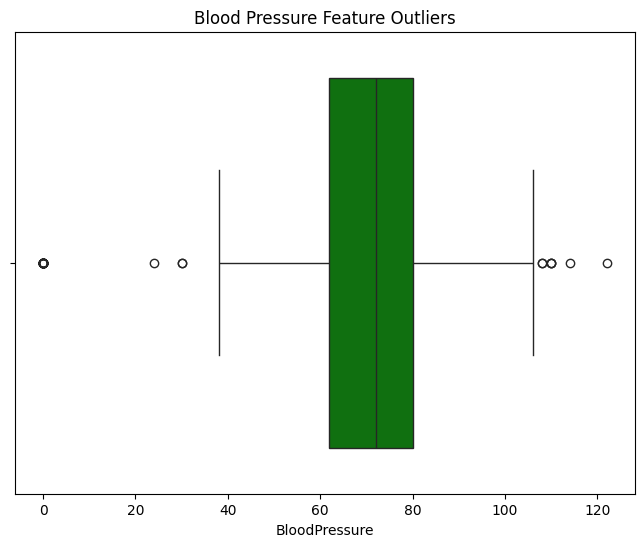

In [ ]:
#  Checking for Outliers (Boxplot for BloodPressure)
plt.figure(figsize=(8, 6))
sns.boxplot(x='BloodPressure', data=df, color='green')
plt.title('Blood Pressure Feature Outliers')
plt.show()

<ipython-input-26-9e97a722027d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_matrix['Outcome'].sort_values(ascending=False).index,


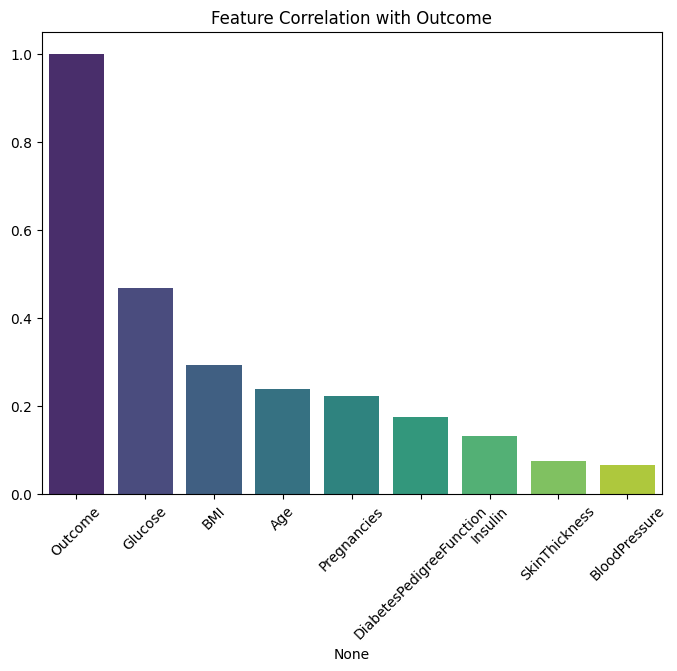

In [ ]:
# Correlation Analysis: Which Features Correlate Most with Outcome
plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_matrix['Outcome'].sort_values(ascending=False).index,
            y=correlation_matrix['Outcome'].sort_values(ascending=False).values, palette='viridis')
plt.title('Feature Correlation with Outcome')
plt.xticks(rotation=45)
plt.show()

In [ ]:

# Feature and label separation
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Scale features for neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)


In [ ]:

class DiabetesModel(nn.Module):
    def __init__(self):
        super(DiabetesModel, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.fc(x)


In [ ]:

def train_model(epsilon):
    model = DiabetesModel()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    # Attach Privacy Engine
    privacy_engine = PrivacyEngine()
    model, optimizer, train_loader_dp = privacy_engine.make_private_with_epsilon(
        module=model,
        optimizer=optimizer,
        data_loader=train_loader,
        target_epsilon=epsilon,
        target_delta=1e-5,
        epochs=10,
        max_grad_norm=1.0,
    )

    model.train()
    for epoch in range(10):
        for X_batch, y_batch in train_loader_dp:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()
    return model


In [ ]:

def evaluate(model):
    model.eval()
    with torch.no_grad():
        predictions = model(X_test_tensor)
        predicted_classes = (predictions > 0.5).float()
        accuracy = accuracy_score(y_test_tensor, predicted_classes)
    return accuracy


In [ ]:
# STEP 2: Import libraries
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from opacus import PrivacyEngine


In [ ]:
# STEP 3: Load the uploaded dataset
# Replace with your uploaded file name
data = pd.read_csv('/content/diabetes.csv')

# If no column names are present, set them manually
data.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [ ]:
# STEP 4: Data Preprocessing
X = data.drop('Outcome', axis=1)
y = data['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.long)


In [ ]:
# STEP 5: Define a simple logistic regression model
class SimpleLogReg(torch.nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.linear = torch.nn.Linear(input_size, 2)

    def forward(self, x):
        return self.linear(x)

model = SimpleLogReg(input_size=8)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


In [ ]:
# Define the model class again
import torch.nn as nn

class LogisticRegressionDP(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionDP, self).__init__()
        self.linear = nn.Linear(input_dim, 2)  # 2 output classes for diabetes prediction

    def forward(self, x):
        return self.linear(x)


In [ ]:
model = LogisticRegressionDP(X_train.shape[1])
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


In [ ]:
train_dataset = TensorDataset(X_train, y_train)

train_loader = DataLoader(
    train_dataset,
    batch_size=64,
    sampler=UniformWithReplacementSampler(
        num_samples=len(train_dataset),
        sample_rate=64/len(train_dataset),  # batch_size / total_samples
    )
)

In [ ]:
privacy_engine = PrivacyEngine()

model, optimizer, train_loader = privacy_engine.make_private_with_epsilon(
    module=model,
    optimizer=optimizer,
    data_loader=train_loader,
    target_epsilon=5.0,
    target_delta=1e-5,
    epochs=10,
    max_grad_norm=1.0,
)


In [ ]:
import torch.nn.functional as F

for epoch in range(10):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = F.cross_entropy(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")

Epoch 1, Loss: 0.8943
Epoch 2, Loss: 0.8776
Epoch 3, Loss: 0.8618
Epoch 4, Loss: 0.8463
Epoch 5, Loss: 0.8310
Epoch 6, Loss: 0.8171
Epoch 7, Loss: 0.8035
Epoch 8, Loss: 0.7905
Epoch 9, Loss: 0.7782
Epoch 10, Loss: 0.7659


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1830: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


In [ ]:
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted.numpy())
print(f"Accuracy on Test Set: {accuracy}%")

Accuracy on Test Set: 0.5974025974025974%


In [1]:
pip install pandas numpy matplotlib scikit-learn


In [3]:
pip install pandas numpy matplotlib scikit-learn diffprivlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.9/176.9 kB 2.9 MB/s eta 0:00:00


Baseline Accuracy: 0.7532, AUC-ROC: 0.8147
Epsilon: 0.1
Accuracy (Objective Perturbation): 0.5260
AUC-ROC (Objective Perturbation): 0.3473
Accuracy (Output Perturbation): 0.5325
AUC-ROC (Output Perturbation): 0.5177
----------------------------------------


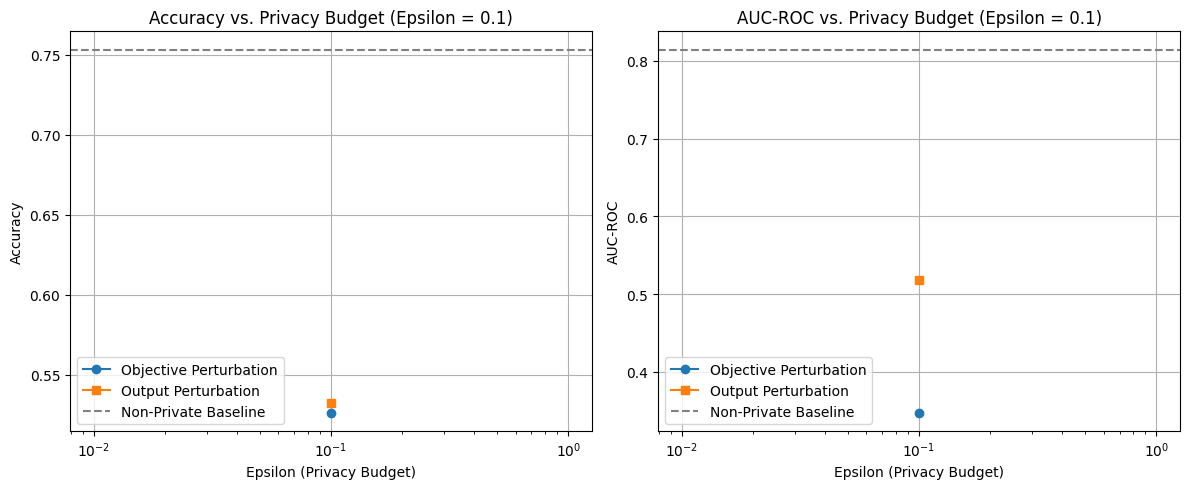

Epsilon: 0.5
Accuracy (Objective Perturbation): 0.6558
AUC-ROC (Objective Perturbation): 0.6579
Accuracy (Output Perturbation): 0.5195
AUC-ROC (Output Perturbation): 0.5199
----------------------------------------


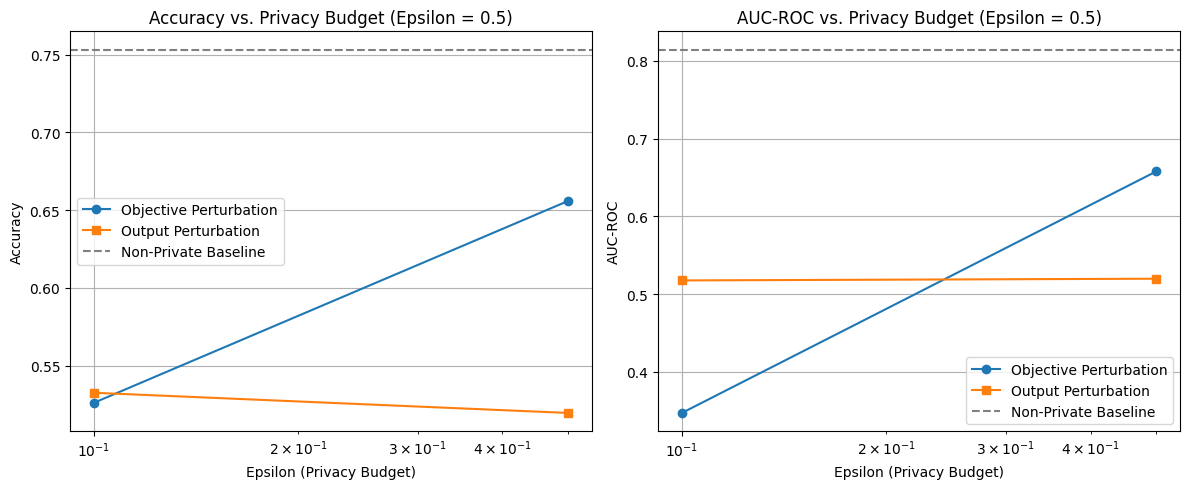

Epsilon: 1.0
Accuracy (Objective Perturbation): 0.7468
AUC-ROC (Objective Perturbation): 0.8606
Accuracy (Output Perturbation): 0.5844
AUC-ROC (Output Perturbation): 0.5779
----------------------------------------


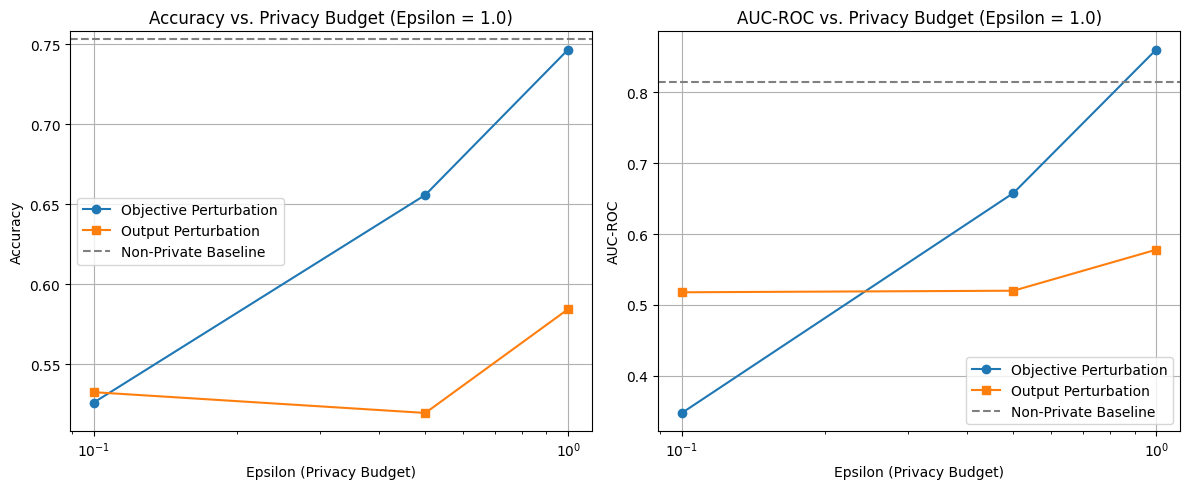

Epsilon: 10.0
Accuracy (Objective Perturbation): 0.7662
AUC-ROC (Objective Perturbation): 0.8174
Accuracy (Output Perturbation): 0.7403
AUC-ROC (Output Perturbation): 0.7649
----------------------------------------


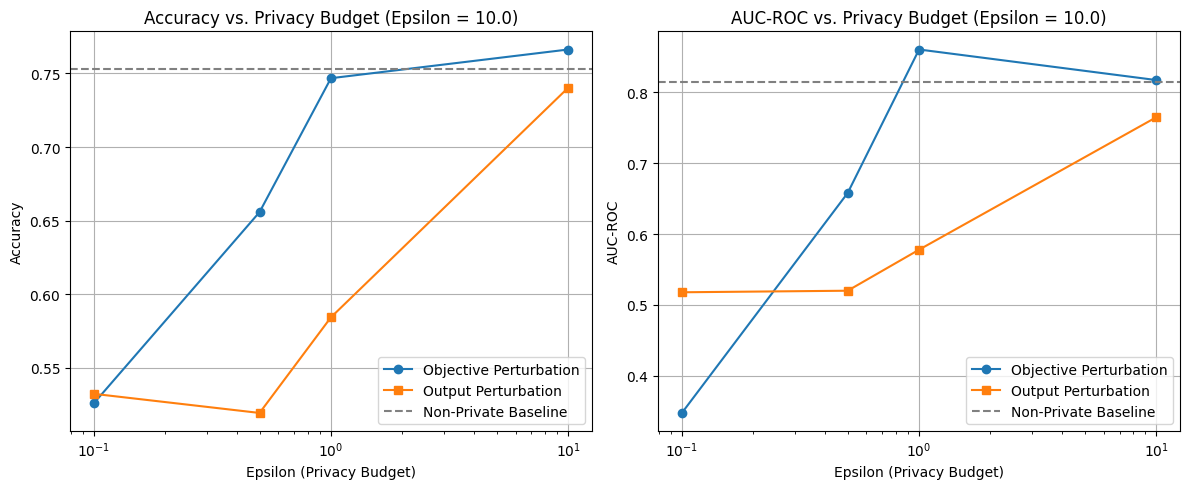

Epsilon: 100.0
Accuracy (Objective Perturbation): 0.7532
AUC-ROC (Objective Perturbation): 0.8182
Accuracy (Output Perturbation): 0.7532
AUC-ROC (Output Perturbation): 0.8160
----------------------------------------


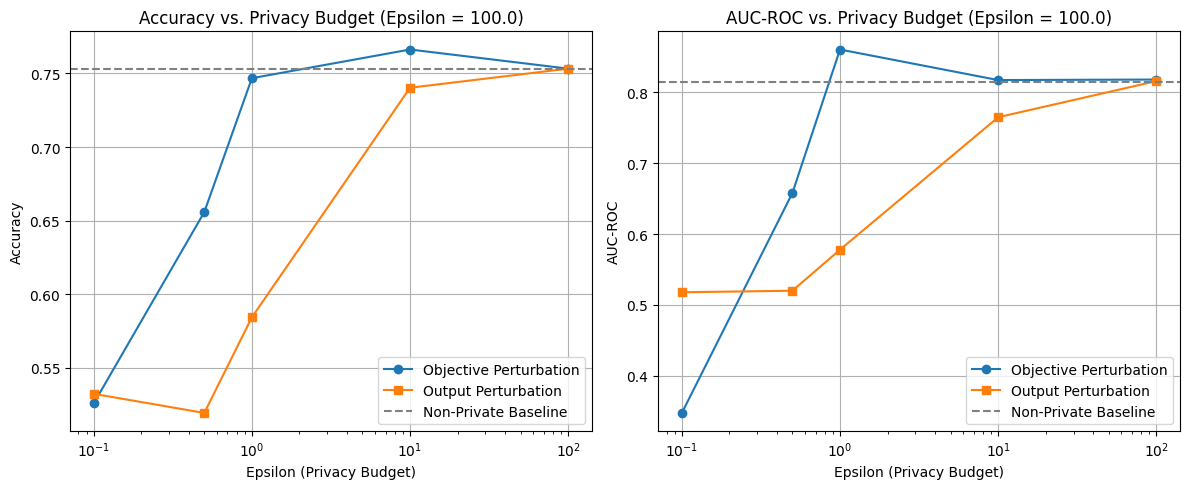

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression as SkLogisticRegression
from diffprivlib.models import LogisticRegression as DPLogisticRegression
from sklearn.preprocessing import StandardScaler

# Load and preprocess data
df = pd.read_csv("diabetes.csv")
X = df.drop(columns="Outcome")
y = df["Outcome"]
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Epsilon values
epsilons = [0.1, 0.5, 1.0, 10.0, 100.0]

# Storage for results
results = {
    "Epsilon": [],
    "Accuracy_Objective": [],
    "AUC_Objective": [],
    "Accuracy_Output": [],
    "AUC_Output": []
}

# Non-private baseline model
baseline_model = SkLogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)
baseline_preds = baseline_model.predict(X_test)
baseline_probs = baseline_model.predict_proba(X_test)[:, 1]
baseline_acc = accuracy_score(y_test, baseline_preds)
baseline_auc = roc_auc_score(y_test, baseline_probs)

print(f"Baseline Accuracy: {baseline_acc:.4f}, AUC-ROC: {baseline_auc:.4f}")

# Evaluate privacy-preserving models
for eps in epsilons:
    # Objective Perturbation (diffprivlib)
    dp_model = DPLogisticRegression(epsilon=eps, data_norm=5.0)
    dp_model.fit(X_train, y_train)
    obj_preds = dp_model.predict(X_test)
    obj_probs = dp_model.predict_proba(X_test)[:, 1]
    acc_obj = accuracy_score(y_test, obj_preds)
    auc_obj = roc_auc_score(y_test, obj_probs)

    # Output Perturbation (simulate by adding noise to predicted probabilities)
    op_model = SkLogisticRegression(max_iter=1000)
    op_model.fit(X_train, y_train)
    raw_probs = op_model.predict_proba(X_test)[:, 1]
    noise = np.random.laplace(loc=0, scale=1/eps, size=raw_probs.shape)
    noisy_probs = np.clip(raw_probs + noise, 0, 1)
    noisy_preds = (noisy_probs >= 0.5).astype(int)
    acc_out = accuracy_score(y_test, noisy_preds)
    auc_out = roc_auc_score(y_test, noisy_probs)

    # Store results
    results["Epsilon"].append(eps)
    results["Accuracy_Objective"].append(acc_obj)
    results["AUC_Objective"].append(auc_obj)
    results["Accuracy_Output"].append(acc_out)
    results["AUC_Output"].append(auc_out)

    # Print results for each epsilon
    print(f"Epsilon: {eps}")
    print(f"Accuracy (Objective Perturbation): {acc_obj:.4f}")
    print(f"AUC-ROC (Objective Perturbation): {auc_obj:.4f}")
    print(f"Accuracy (Output Perturbation): {acc_out:.4f}")
    print(f"AUC-ROC (Output Perturbation): {auc_out:.4f}")
    print("-" * 40)

    # Plot for each epsilon
    plt.figure(figsize=(12, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(results["Epsilon"], results["Accuracy_Objective"], marker='o', label="Objective Perturbation")
    plt.plot(results["Epsilon"], results["Accuracy_Output"], marker='s', label="Output Perturbation")
    plt.axhline(y=baseline_acc, color='gray', linestyle='--', label="Non-Private Baseline")
    plt.xscale('log')
    plt.xlabel("Epsilon (Privacy Budget)")
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy vs. Privacy Budget (Epsilon = {eps})")
    plt.legend()
    plt.grid(True)

    # Plot AUC-ROC
    plt.subplot(1, 2, 2)
    plt.plot(results["Epsilon"], results["AUC_Objective"], marker='o', label="Objective Perturbation")
    plt.plot(results["Epsilon"], results["AUC_Output"], marker='s', label="Output Perturbation")
    plt.axhline(y=baseline_auc, color='gray', linestyle='--', label="Non-Private Baseline")
    plt.xscale('log')
    plt.xlabel("Epsilon (Privacy Budget)")
    plt.ylabel("AUC-ROC")
    plt.title(f"AUC-ROC vs. Privacy Budget (Epsilon = {eps})")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


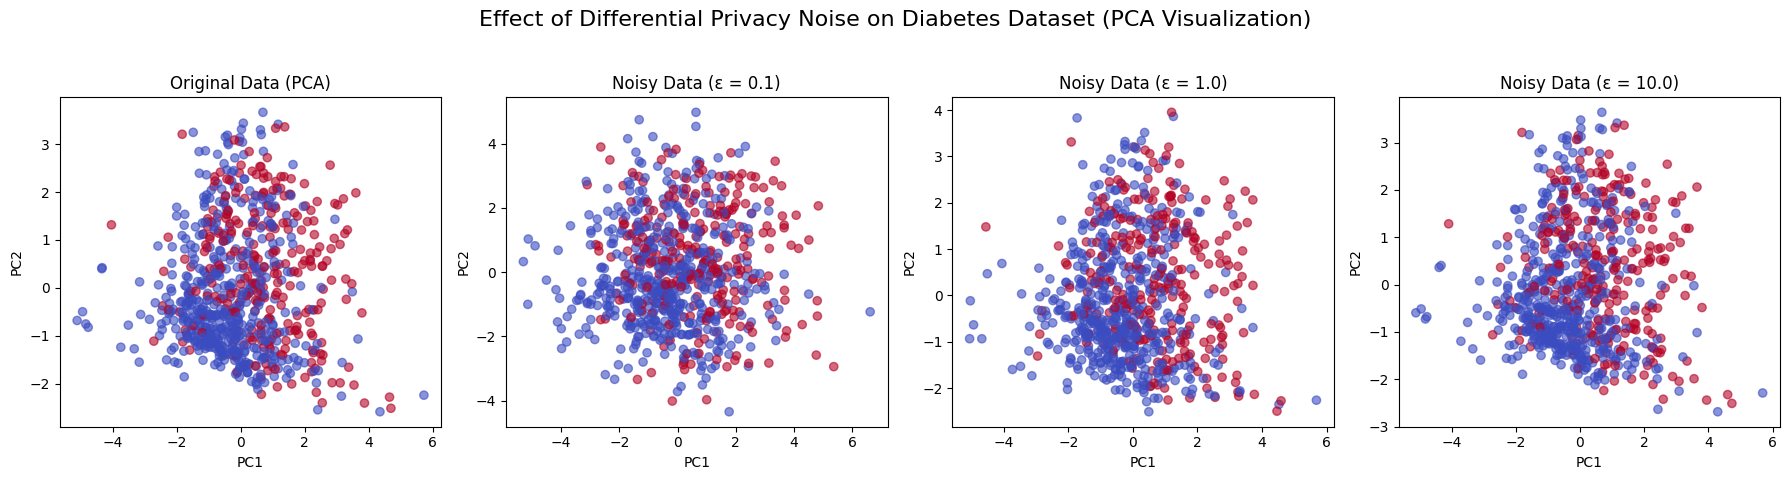

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv("diabetes.csv")
X = df.drop(columns="Outcome")
y = df["Outcome"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Map epsilon to standard deviation of noise (inversely proportional)
# The higher the epsilon, the lower the noise
epsilon_levels = [0.1, 1.0, 10.0]
noise_std_map = {0.1: 1.0, 1.0: 0.3, 10.0: 0.05}

# PCA for original data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting setup
plt.figure(figsize=(18, 5))

# Plot original
plt.subplot(1, 4, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.title("Original Data (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Plot with different epsilon levels
for i, eps in enumerate(epsilon_levels):
    noise_std = noise_std_map[eps]
    noise = np.random.normal(0, noise_std, X_scaled.shape)
    X_noisy = X_scaled + noise
    X_noisy_pca = pca.transform(X_noisy)

    plt.subplot(1, 4, i + 2)
    plt.scatter(X_noisy_pca[:, 0], X_noisy_pca[:, 1], c=y, cmap='coolwarm', alpha=0.6)
    plt.title(f"Noisy Data (ε = {eps})")
    plt.xlabel("PC1")
    plt.ylabel("PC2")

plt.suptitle("Effect of Differential Privacy Noise on Diabetes Dataset (PCA Visualization)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
